In [2]:
%cd /mnt/disk1/RUNS/sonec_iv/pike_kraken_V3_V4/filt_res
%pwd

/mnt/disk1/RUNS/sonec_iv/pike_kraken_V3_V4/filt_res


'/mnt/disk1/RUNS/sonec_iv/pike_kraken_V3_V4/filt_res'

In [3]:
%ls

V3_V4_1_bracken_species.txt  V3_V4_R1_bracken_species.txt
V3_V4_2_bracken_species.txt  V3_V4_R2_bracken_species.txt
V3_V4_3_bracken_species.txt  V3_V4_R3_bracken_species.txt


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pandas import read_csv, DataFrame

In [5]:
folder_path = ('/mnt/disk1/RUNS/sonec_iv/pike_kraken_V3_V4/filt_res') # Replace with the actual path to your folder
file_extension = '.txt'

In [6]:
merged_df = pd.DataFrame()

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(file_extension):
        file_path = os.path.join(folder_path, file_name)
        
        # Step 2: Extract the desired columns from each file
        temp_df = pd.read_csv(file_path, delimiter='\t', header=None,usecols=[1,2])
        
        # Extract the sample number from the file name
        sample_number = os.path.splitext(file_name)[0]
        
        # Add the sample number as a new column in the DataFrame
        temp_df['sample_number'] = sample_number
        
        # Step 3: Merge the data into one DataFrame
        merged_df = pd.concat([merged_df, temp_df])
merged_df.columns=["Num_of_reads", "Species", "Sample"]
merged_df['Sample']=merged_df['Sample'].str.replace('_bracken_species','')
merged_df= merged_df.reset_index(drop=True)
merged_df

,Num_of_reads,Species,Sample
0,254235,Klebsiella pneumoniae,V3_V4_3
1,9343,Acinetobacter radioresistens,V3_V4_3
2,162,Acinetobacter johnsonii,V3_V4_3
3,23044,Mycoplasma gallisepticum,V3_V4_3
4,18262,Bifidobacterium animalis,V3_V4_3
5,2470,Lactococcus lactis,V3_V4_3
6,44,Flavobacterium davisii,V3_V4_3
7,312250,Klebsiella pneumoniae,V3_V4_2
8,5113,Escherichia coli,V3_V4_2
9,9531,Acinetobacter radioresistens,V3_V4_2


In [11]:
new_table = {}

for sample in merged_df['Sample'].unique():
    
    sample_subset = merged_df[merged_df['Sample'] == sample]
    new_table[sample] = {sample_subset['Species'][idx] : sample_subset['Num_of_reads'][idx] for idx in sample_subset.index}

new_table = DataFrame(new_table).fillna(0).T
sorted_names = ['V3_V4_1',
                'V3_V4_2',
                'V3_V4_3',
                'V3_V4_R1',
                'V3_V4_R2',
                'V3_V4_R3']
                
new_table=new_table.loc[sorted_names]
new_table.head(10)

,Klebsiella pneumoniae,Acinetobacter radioresistens,Acinetobacter johnsonii,Mycoplasma gallisepticum,Bifidobacterium animalis,Lactococcus lactis,Flavobacterium davisii,Escherichia coli,Cutibacterium acnes,Streptococcus thermophilus,Acinetobacter baumannii,Roseicitreum antarcticum
V3_V4_1,161057.0,5566.0,165.0,14314.0,11218.0,0.0,0.0,0.0,768.0,0.0,0.0,0.0
V3_V4_2,312250.0,9531.0,0.0,30747.0,22113.0,0.0,0.0,5113.0,0.0,0.0,0.0,0.0
V3_V4_3,254235.0,9343.0,162.0,23044.0,18262.0,2470.0,44.0,0.0,0.0,0.0,0.0,0.0
V3_V4_R1,250862.0,13936.0,366.0,28634.0,18884.0,0.0,50.0,6089.0,0.0,0.0,884.0,0.0
V3_V4_R2,122750.0,12789.0,271.0,17646.0,10542.0,0.0,0.0,9060.0,0.0,1893.0,0.0,0.0
V3_V4_R3,141058.0,9938.0,205.0,17240.0,10910.0,1560.0,0.0,0.0,0.0,0.0,0.0,3.0


In [12]:
new_table.columns
def get_color(obj_dict):
    import random    
    color = ''
    
    while color not in obj_dict.values() and color == '':
        
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    return color
color_dict = {}

for taxon in new_table.columns:
    
    color_dict[taxon] = get_color(color_dict)
color_dict

{'Klebsiella pneumoniae': '#CE18A4',
 'Acinetobacter radioresistens': '#FC2F7D',
 'Acinetobacter johnsonii': '#CAC2D0',
 'Mycoplasma gallisepticum': '#B228C7',
 'Bifidobacterium animalis': '#B30FEA',
 'Lactococcus lactis': '#1259FC',
 'Flavobacterium davisii': '#6A2F7E',
 'Escherichia coli': '#44E1EB',
 'Cutibacterium acnes': '#7E8478',
 'Streptococcus thermophilus': '#2AB8A8',
 'Acinetobacter baumannii': '#C7CAAE',
 'Roseicitreum antarcticum': '#A0C7F0'}

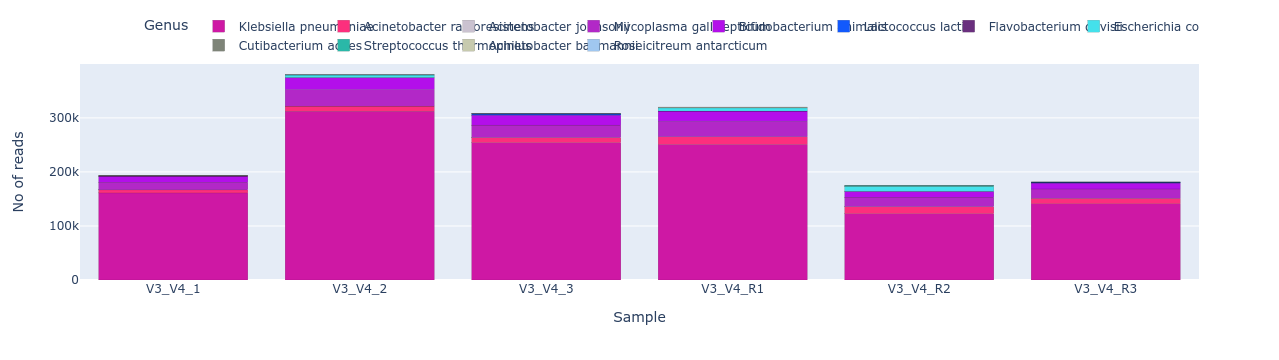

In [16]:
fig = px.bar(new_table, 
             x=new_table.index, 
             y=new_table.columns, 
             labels = dict(index = "Sample", value = "No of reads"),color_discrete_map=color_dict,)
fig.update_traces(marker_line=dict(width=.1, color='black'))
fig.update_layout(legend=dict(
    orientation="h",
    entrywidth=80,
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title = 'Genus'
))
#fig.write_html("RESISTANCE_PROFILE.html")

fig.show()